In [1]:
# initialisations
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel
import random
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
sns.set(
    palette="Paired",
    style='whitegrid',
    color_codes=True,
    rc={"figure.figsize": (12,8)},
)

In [3]:
url='https://drive.google.com/file/d/1XN0P7t7koCNMcpFDTdhWQAQpv_G6yf6C/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
bank_df = pd.read_csv(url, sep=';')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Descriptive Stats

In [4]:
bank_df.shape

(41188, 21)

In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
bank_df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## Univariate Analysis

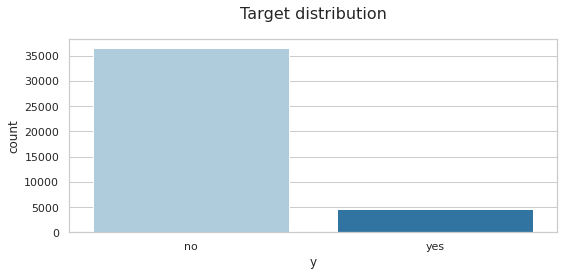

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=bank_df['y'], ax=ax)

abs_vals = bank_df['y'].value_counts()
rel_vals = bank_df['y'].value_counts(normalize=True) * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_vals, rel_vals)]

#ax.bar_label(container=ax.containers[0], labels=labels)
ax.set_title('Target distribution', fontsize=16, pad=20)

plt.tight_layout();

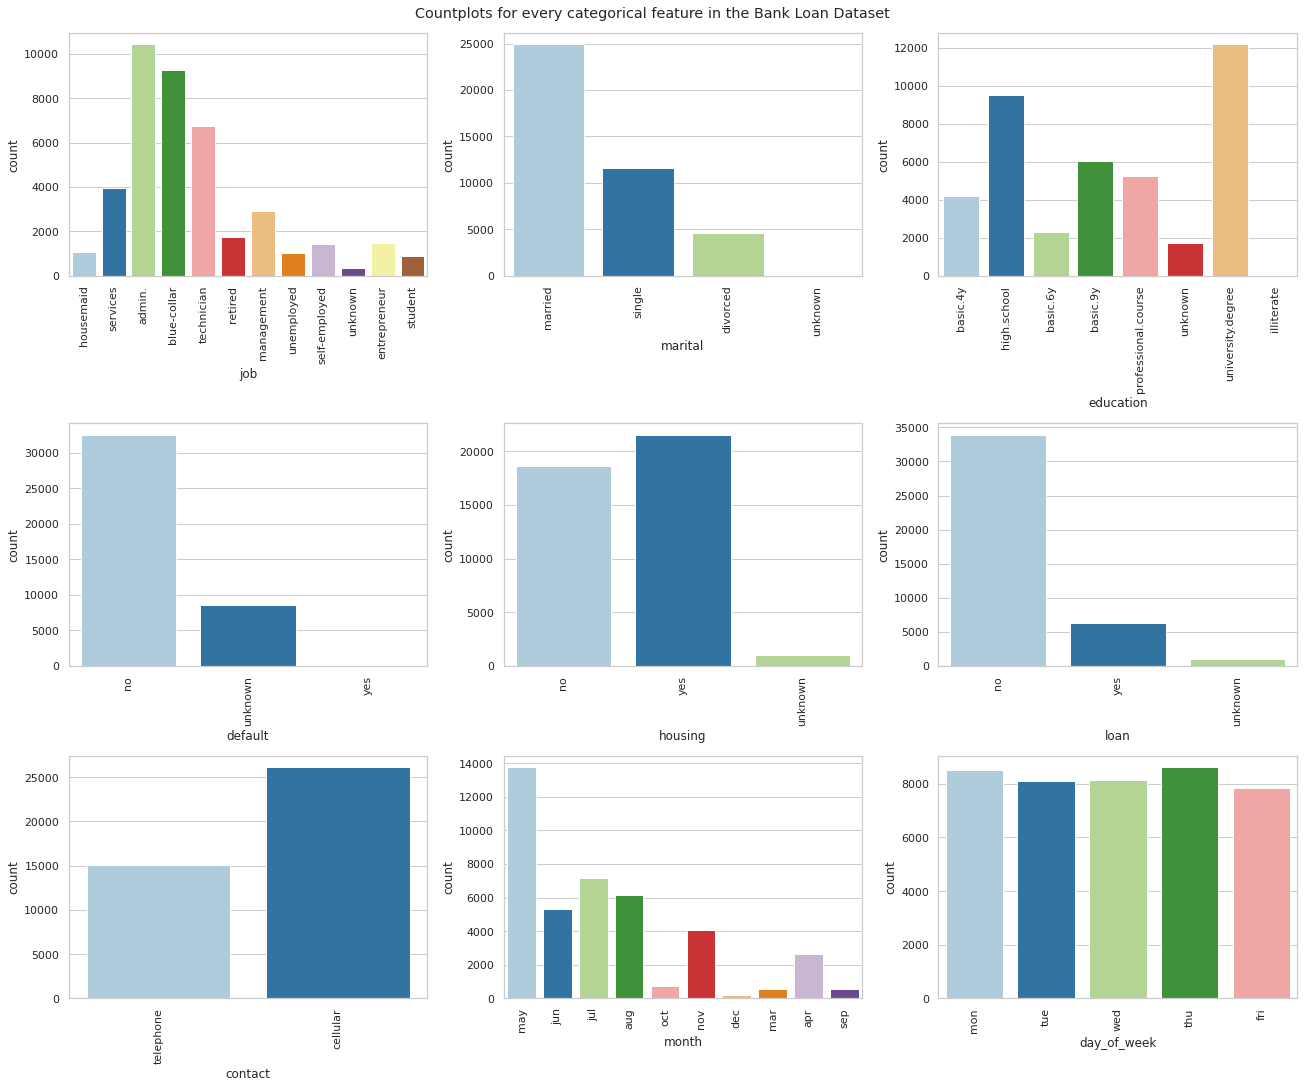

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15), constrained_layout=True)


fig.suptitle('Countplots for every categorical feature in the Bank Loan Dataset')

sns.countplot(ax=axes[0, 0], data=bank_df, x='job')
sns.countplot(ax=axes[0, 1], data=bank_df, x='marital')
sns.countplot(ax=axes[0, 2], data=bank_df, x='education')
sns.countplot(ax=axes[1, 0], data=bank_df, x='default')
sns.countplot(ax=axes[1, 1], data=bank_df, x='housing')
sns.countplot(ax=axes[1, 2], data=bank_df, x='loan')
sns.countplot(ax=axes[2, 0], data=bank_df, x='contact')
sns.countplot(ax=axes[2, 1], data=bank_df, x='month')
sns.countplot(ax=axes[2, 2], data=bank_df, x='day_of_week')

for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)

## Bivariate Analysis

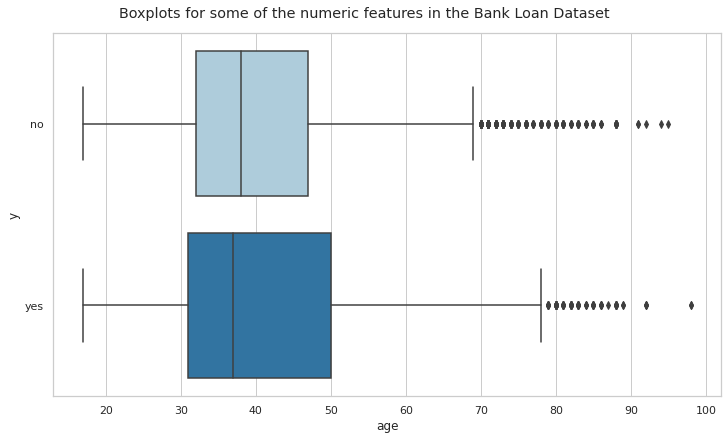

In [45]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6), constrained_layout=True)
color = dict(boxes='black', whiskers='black', medians='red', caps='black')

fig.suptitle('Boxplots for some of the numeric features in the Bank Loan Dataset')

sns.boxplot(ax=axes, x='age', y='y', data=bank_df)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

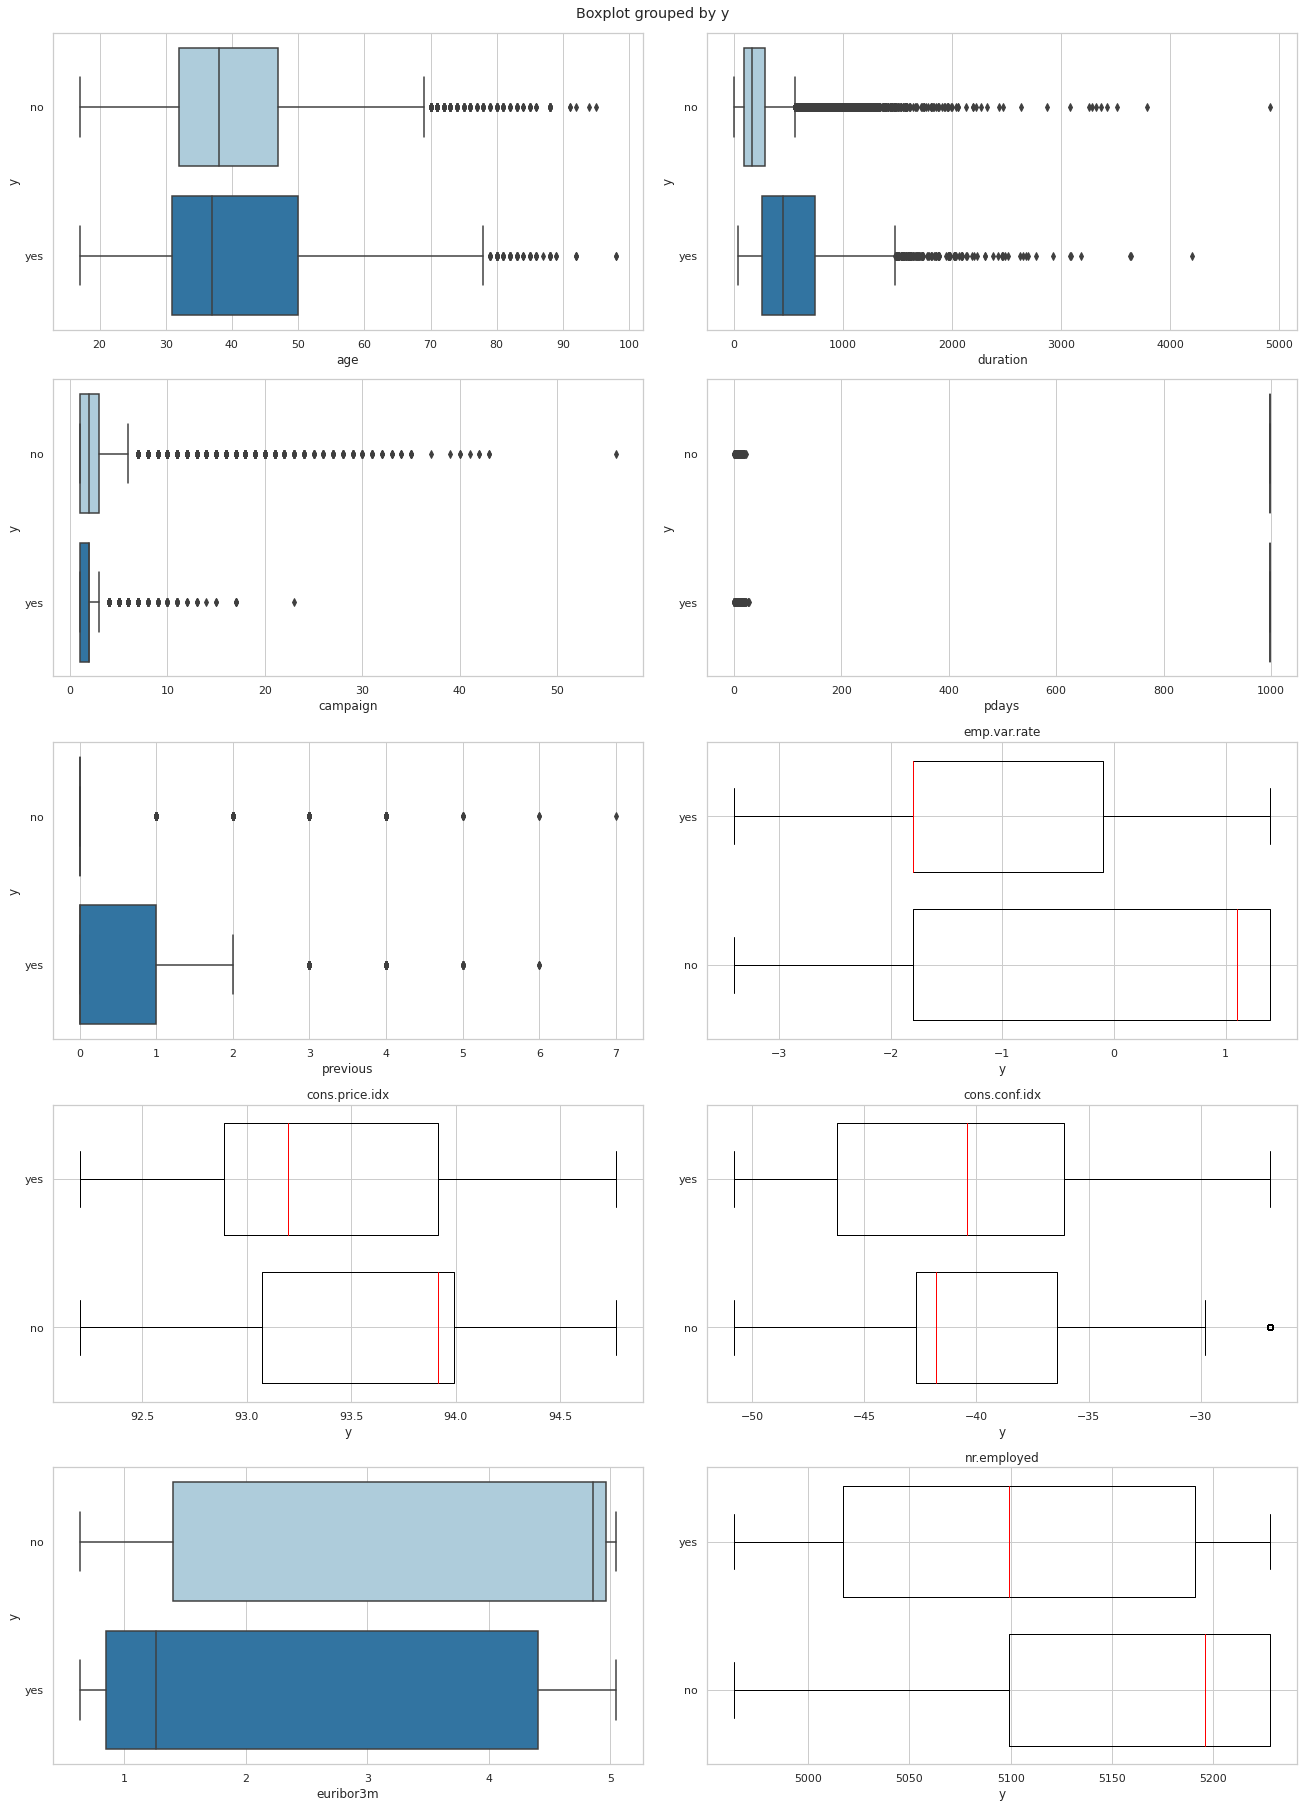

In [10]:
fig, axes = plt.subplots(5, 2, figsize=(18, 25), constrained_layout=True)
color = dict(boxes='black', whiskers='black', medians='red', caps='black')

fig.suptitle('Boxplots for some of the numeric features in the Bank Loan Dataset')

sns.boxplot(ax=axes[0,0], x='age', y='y', data=bank_df)
sns.boxplot(ax=axes[0,1], x='duration', y='y', data=bank_df)
sns.boxplot(ax=axes[1,0], x='campaign', y='y', data=bank_df)
sns.boxplot(ax=axes[1,1], x='pdays', y='y', data=bank_df)
sns.boxplot(ax=axes[2,0], x='previous', y='y', data=bank_df)
bank_df.boxplot(ax=axes[2,1], column='emp.var.rate', by='y', vert=False, widths=0.75, color=color,whiskerprops = dict(linestyle='-',linewidth=1.0
, color='black'))
bank_df.boxplot(ax=axes[3,0], column='cons.price.idx', by='y', vert=False, widths=0.75, color=color,whiskerprops = dict(linestyle='-',linewidth=1.0
, color='black'))
bank_df.boxplot(ax=axes[3,1], column='cons.conf.idx', by='y', vert=False, widths=0.75, color=color,whiskerprops = dict(linestyle='-',linewidth=1.0
, color='black'))
sns.boxplot(ax=axes[4,0], x='euribor3m', y='y', data=bank_df)
bank_df.boxplot(ax=axes[4,1], column='nr.employed', by='y', vert=False, widths=0.75, color=color,whiskerprops = dict(linestyle='-',linewidth=1.0
, color='black'))

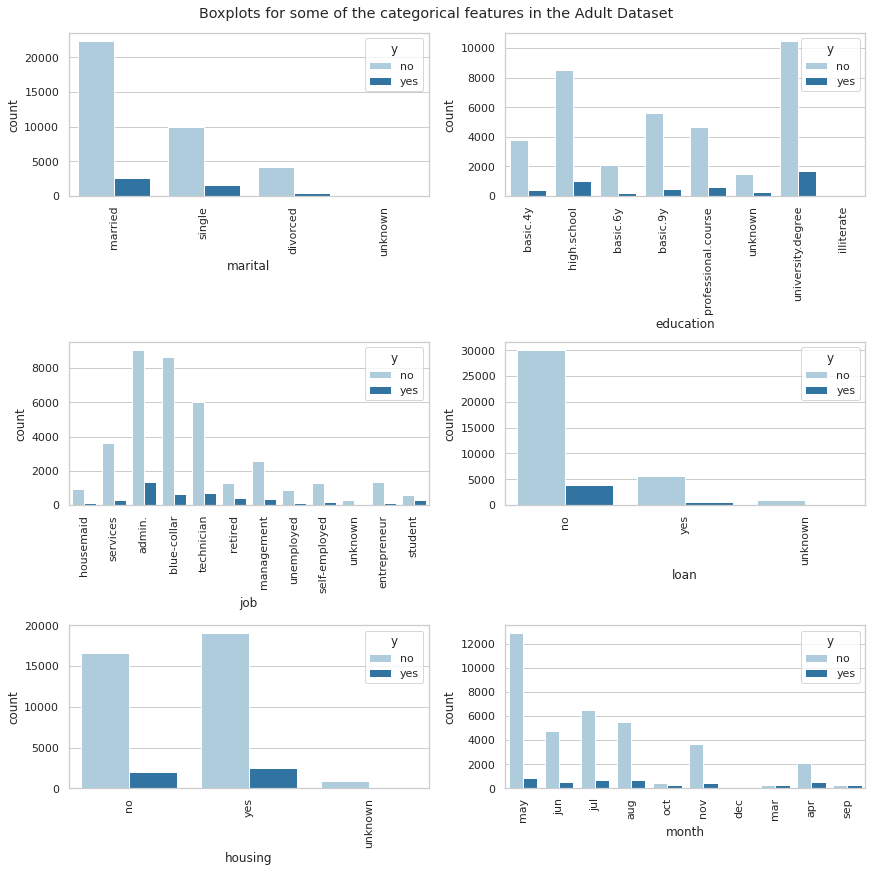

In [46]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)
total = float(len(bank_df))

fig.suptitle('Boxplots for some of the categorical features in the Adult Dataset')

sns.countplot(ax=axes[0,0], x="marital", hue="y", data=bank_df)
sns.countplot(ax=axes[0,1], x="education", hue="y", data=bank_df)
sns.countplot(ax=axes[1,0], x="job", hue="y", data=bank_df)
sns.countplot(ax=axes[1,1], x="loan", hue="y", data=bank_df,)
sns.countplot(ax=axes[2,0], x="housing", hue="y", data=bank_df)
sns.countplot(ax=axes[2,1], x="month", hue="y", data=bank_df,)

for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)

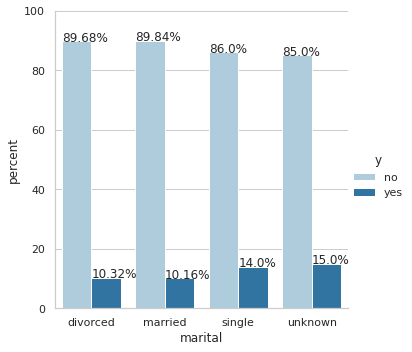

In [12]:
x,y = 'marital', 'y'

df1 = bank_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

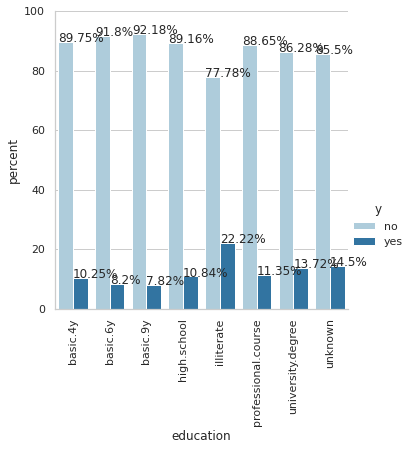

In [13]:
x,y = 'education', 'y'

df1 = bank_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

g.set_xticklabels(rotation=90)

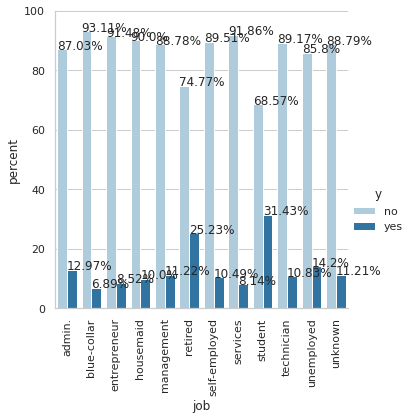

In [14]:
x,y = 'job', 'y'

df1 = bank_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
g.set_xticklabels(rotation=90)

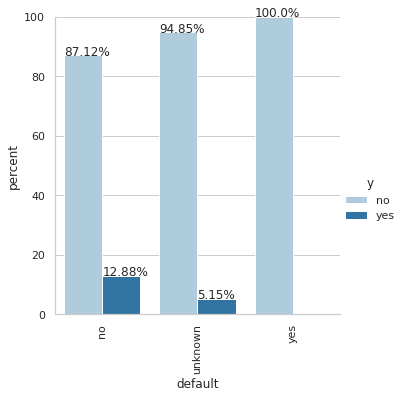

In [15]:
x,y = 'default', 'y'

df1 = bank_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
g.set_xticklabels(rotation=90)

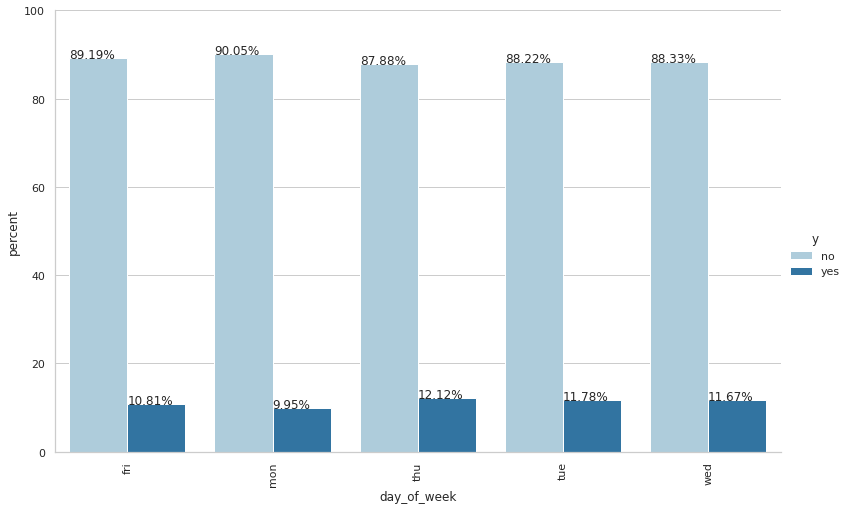

In [16]:
x,y = 'day_of_week', 'y'

df1 = bank_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=7,aspect=11/7)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
g.set_xticklabels(rotation=90)

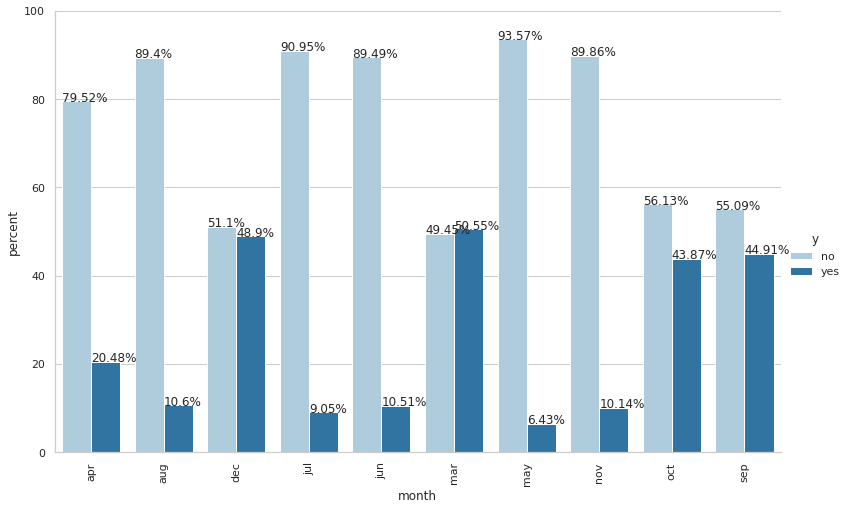

In [17]:
x,y = 'month', 'y'

df1 = bank_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,height=7,aspect=11/7)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
g.set_xticklabels(rotation=90)

## T-Test Hypothesis testing for continuous variables

In [18]:
# In this example it is said that:
# Null Hypothesis : there is no difference in Mean of those in each strata of the target group
# Alternate Hypothesis : there is difference in Mean of those in each strata of the target group

data = bank_df[(np.abs(stats.zscore(bank_df["age"])) < 3)]

income_1 = data[bank_df['y']=='yes']["age"]
income_0 = data[bank_df['y']=='no']["age"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 2.431693862449763
p value 0.015980392544663526
we reject null hypothesis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [19]:
# In this example it is said that:
# Null Hypothesis : there is no difference in Mean of those in each strata of the target group
# Alternate Hypothesis : there is difference in Mean of those in each strata of the target group
data = bank_df[(np.abs(stats.zscore(bank_df["duration"])) < 3)]

income_1 = data[bank_df['y']=='yes']["duration"]
income_0 = data[bank_df['y']=='no']["duration"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 7.615110529021831
p value 1.2385040079165465e-12
we reject null hypothesis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [20]:
# In this example it is said that:
# Null Hypothesis : there is no difference in Mean of those in each strata of the target group
# Alternate Hypothesis : there is difference in Mean of those in each strata of the target group

data = bank_df[(np.abs(stats.zscore(bank_df["campaign"])) < 3)]

income_1 = data[bank_df['y']=='yes']["campaign"]
income_0 = data[bank_df['y']=='no']["campaign"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest -1.1181113845233885
p value 0.2649727743171096
we accept null hypothesis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [21]:
# In this example it is said that:
# Null Hypothesis : there is no difference in Mean of those in each strata of the target group
# Alternate Hypothesis : there is difference in Mean of those in each strata of the target group

data = bank_df[(np.abs(stats.zscore(bank_df["pdays"])) < 3)]

income_1 = data[bank_df['y']=='yes']["pdays"]
income_0 = data[bank_df['y']=='no']["pdays"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


ttest nan
p value nan
we accept null hypothesis


In [22]:
# In this example it is said that:
# Null Hypothesis : there is no difference in Mean of those in each strata of the target group
# Alternate Hypothesis : there is difference in Mean of those in each strata of the target group

data = bank_df[(np.abs(stats.zscore(bank_df["previous"])) < 3)]

income_1 = data[bank_df['y']=='yes']["previous"]
income_0 = data[bank_df['y']=='no']["previous"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


ttest 1.8132354723611555
p value 0.07141376557757187
we accept null hypothesis


## Chi-Squared Hypothesis testing for categorical varibles

In [23]:
# contingency table for job
c_t = pd.crosstab(bank_df['job'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

y,no,yes
job,,
admin.,14,5
blue-collar,17,1
entrepreneur,5,0
housemaid,4,0
management,4,0
retired,4,1
self-employed,8,0
services,5,1
technician,11,0


In [24]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between job and income.
# Alternate Hypothesis: There is a relationship between job and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=9
p_value 0.28432824583051
[[17.14634146  1.85365854]
 [16.24390244  1.75609756]
 [ 4.51219512  0.48780488]
 [ 3.6097561   0.3902439 ]
 [ 3.6097561   0.3902439 ]
 [ 4.51219512  0.48780488]
 [ 7.2195122   0.7804878 ]
 [ 5.41463415  0.58536585]
 [ 9.92682927  1.07317073]
 [ 1.80487805  0.19512195]]
probability=0.950, critical=16.919, stat=10.876
Independent (accept null hypothesis, H0)


In [25]:
# contingency table for marital
c_t = pd.crosstab(bank_df['marital'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

y,no,yes
marital,,
divorced,8,1
married,48,5
single,18,2


In [26]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between marital status and income.
# Alternate Hypothesis: There is a relationship between marital status and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=2
p_value 0.9869030547748735
[[ 8.12195122  0.87804878]
 [47.82926829  5.17073171]
 [18.04878049  1.95121951]]
probability=0.950, critical=5.991, stat=0.026
Independent (accept null hypothesis, H0)


In [27]:
# contingency table for education
c_t = pd.crosstab(bank_df['education'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

y,no,yes
education,,
basic.4y,12,0
basic.6y,4,1
basic.9y,11,0
high.school,11,3
professional.course,6,0
university.degree,26,3
unknown,4,1


In [28]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between education and income.
# Alternate Hypothesis: There is a relationship between education and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=6
p_value 0.36906014894282035
[[10.82926829  1.17073171]
 [ 4.51219512  0.48780488]
 [ 9.92682927  1.07317073]
 [12.63414634  1.36585366]
 [ 5.41463415  0.58536585]
 [26.17073171  2.82926829]
 [ 4.51219512  0.48780488]]
probability=0.950, critical=12.592, stat=6.505
Independent (accept null hypothesis, H0)


In [29]:
# contingency table for default
c_t = pd.crosstab(bank_df['default'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

y,no,yes
default,,
no,60,8
unknown,14,0


In [30]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between default and income.
# Alternate Hypothesis: There is a relationship between default and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=1
p_value 0.39176643654601395
[[61.36585366  6.63414634]
 [12.63414634  1.36585366]]
probability=0.950, critical=3.841, stat=0.733
Independent (accept null hypothesis, H0)


In [31]:
# contingency table for housing
c_t = pd.crosstab(bank_df['housing'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

y,no,yes
housing,,
no,29,3
unknown,3,0
yes,42,5


In [32]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between housing and income.
# Alternate Hypothesis: There is a relationship between housing and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=2
p_value 0.830626575063253
[[28.87804878  3.12195122]
 [ 2.70731707  0.29268293]
 [42.41463415  4.58536585]]
probability=0.950, critical=5.991, stat=0.371
Independent (accept null hypothesis, H0)


In [33]:
# contingency table for loan
c_t = pd.crosstab(bank_df['loan'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

y,no,yes
loan,,
no,59,7
unknown,3,0
yes,12,1


In [34]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between loan and income.
# Alternate Hypothesis: There is a relationship between loan and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=2
p_value 0.8019690337179721
[[59.56097561  6.43902439]
 [ 2.70731707  0.29268293]
 [11.73170732  1.26829268]]
probability=0.950, critical=5.991, stat=0.441
Independent (accept null hypothesis, H0)


In [35]:
# contingency table for contact
c_t = pd.crosstab(bank_df['contact'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

y,no,yes
contact,,
cellular,45,7
telephone,29,1


In [36]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between contact and income.
# Alternate Hypothesis: There is a relationship between contact and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=1
p_value 0.27025424476807136
[[46.92682927  5.07317073]
 [27.07317073  2.92682927]]
probability=0.950, critical=3.841, stat=1.215
Independent (accept null hypothesis, H0)


In [37]:
# contingency table for month
c_t = pd.crosstab(bank_df['month'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

y,no,yes
month,,
apr,3,2
aug,11,2
dec,1,0
jul,10,2
jun,13,1
mar,2,0
may,29,1
nov,5,0


In [38]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between month and income.
# Alternate Hypothesis: There is a relationship between month and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=7
p_value 0.2755045496683338
[[ 4.51219512  0.48780488]
 [11.73170732  1.26829268]
 [ 0.90243902  0.09756098]
 [10.82926829  1.17073171]
 [12.63414634  1.36585366]
 [ 1.80487805  0.19512195]
 [27.07317073  2.92682927]
 [ 4.51219512  0.48780488]]
probability=0.950, critical=14.067, stat=8.692
Independent (accept null hypothesis, H0)


In [39]:
# contingency table for day of week
c_t = pd.crosstab(bank_df['day_of_week'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

y,no,yes
day_of_week,,
fri,14,3
mon,21,0
thu,15,2
tue,8,0
wed,16,3


In [40]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between day of week and income.
# Alternate Hypothesis: There is a relationship between day of week and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=4
p_value 0.26729763731869577
[[15.34146341  1.65853659]
 [18.95121951  2.04878049]
 [15.34146341  1.65853659]
 [ 7.2195122   0.7804878 ]
 [17.14634146  1.85365854]]
probability=0.950, critical=9.488, stat=5.201
Independent (accept null hypothesis, H0)


In [41]:
# contingency table for p outcome
c_t = pd.crosstab(bank_df['poutcome'].sample(frac=0.002, replace=True, random_state=1),bank_df['y'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

y,no,yes
poutcome,,
failure,8,2
nonexistent,66,4
success,0,2


In [42]:
# In this example it is said that:
# Null Hypothesis: There is no relationship between p outcome and income.
# Alternate Hypothesis: There is a relationship between p outcome and income.

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (accept null hypothesis, H0)')

dof=2
p_value 2.7664327368211625e-05
[[ 9.02439024  0.97560976]
 [63.17073171  6.82926829]
 [ 1.80487805  0.19512195]]
probability=0.950, critical=5.991, stat=20.991
Dependent (reject H0)


## Multivariate Relationships

In [43]:
# Correlation among the numeric variables heatmap (requires pre-processing)